# Import Libraries

In [ ]:
import numpy as np
from sklearn.cluster import KMeans 
import csv
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from utils import Utility

# Load and Analyse Data

In [ ]:
utils = Utility()
news_data = utils.load_data('Data/bbc-text.csv')
news_data = shuffle(news_data)
news_data.reset_index(inplace=True, drop=True)

In [ ]:
news_data.head()

,category,text
0,business,industrial revival hope for japan japanese ind...
1,politics,e-university disgraceful waste a failed gove...
2,entertainment,us to raise tv indecency fines us politician...
3,entertainment,branson show flops on us screens entrepreneur ...
4,business,low-cost airlines hit eurotunnel channel tunne...


In [ ]:
news_data.tail()

,category,text
2220,politics,howard rejects bnp s claim tory leader michael...
2221,business,standard life cuts policy bonuses standard lif...
2222,tech,players sought for $1m prize uk gamers are get...
2223,business,wmc profits up amid bid criticism australian m...
2224,business,parmalat founder offers apology the founder an...


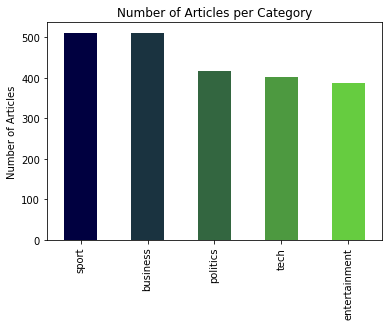

In [ ]:
colors = [(x/10.0, x/5.0, 0.25) for x in range(5)] 
news_data.category.value_counts().plot(kind='bar',color=colors)
plt.title('Number of Articles per Category')
plt.ylabel('Number of Articles')
plt.show()

In [ ]:
print('Total categories: ' + str(np.unique(news_data['category'])))
print('Total number of news articles: ' + str(len(news_data['text'])))
news_data.describe()

Total categories: ['business' 'entertainment' 'politics' 'sport' 'tech']
Total number of news articles: 2225


,category,text
count,2225,2225
unique,5,2126
top,sport,apple ipod family expands market apple has exp...
freq,511,2


# Embedding Text

In [ ]:
word_embeddings = []
for i in range(2225):
    word_embeddings.append(utils.get_embeddings(news_data['text'][i]))

In [ ]:
word_embeddings = np.array(word_embeddings)
print('Embedding\'s Shape : ',word_embeddings.shape)

Embedding's Shape :  (2225, 300)


# Find number of clusters using Elbow-method

1 277.79204189651955
2 238.31991826863103
3 221.78819886396133
4 206.51675962914578
5 192.41915791059063
6 187.09522736399205
7 181.9339936163308
8 178.20223512399957
9 174.83885039458434
10 172.12635178489134


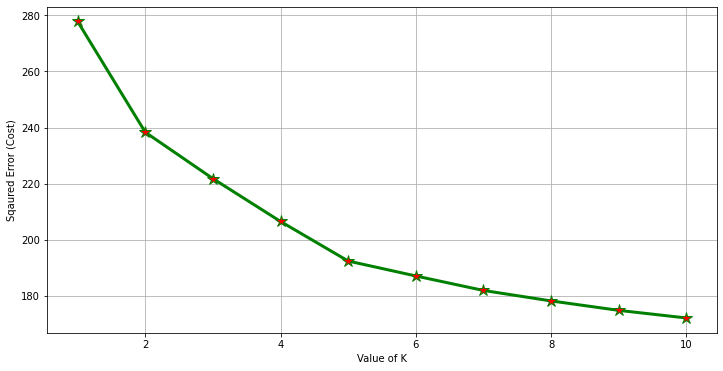

In [ ]:
cost = []

for k in range(1,11):
    kmeanModel= KMeans(n_clusters=k,n_init=30,max_iter=200) 
    kmeanModel.fit(word_embeddings)
    cost.append(kmeanModel.inertia_) 
    print(k,cost[k-1])
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11), cost, linewidth=3, color="Green", marker ="*", markerfacecolor="Red", markerfacecoloralt="Red", markersize=12) 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()

# Clustering

In [ ]:
K = 5
kmeanModel= KMeans(n_clusters=K,verbose=0,n_init=30,max_iter=300)
kmeanModel.fit(word_embeddings)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_pred = kmeanModel.predict(word_embeddings)  

In [ ]:
tsne = TSNE(n_components=2, perplexity=100,learning_rate=100.0,n_iter=700, metric='euclidean', verbose=1)
tsne_results = tsne.fit_transform(word_embeddings)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 2225 samples in 0.073s...
[t-SNE] Computed neighbors for 2225 samples in 3.400s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2225
[t-SNE] Computed conditional probabilities for sample 2000 / 2225
[t-SNE] Computed conditional probabilities for sample 2225 / 2225
[t-SNE] Mean sigma: 0.131641
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.129761
[t-SNE] KL divergence after 700 iterations: 0.861503


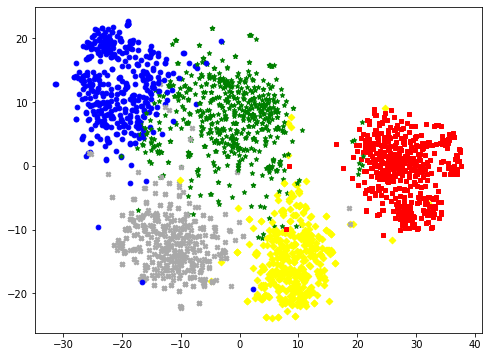

In [ ]:
clr = ['Blue','Green','Red','Darkgray','Yellow']
markers = ['o','*','s','X','D']
area = np.pi*7
plt.figure(figsize=(8,6))
for i in range(tsne_results.shape[0]):
    X = tsne_results[:,0][i]
    Y = tsne_results[:,1][i]
    plt.scatter(X, Y, s=area, color=clr[y_pred[i]], marker=markers[y_pred[i]])
plt.show()

# Result Analysis

In [ ]:
news_data['cluster'] = y_pred
news_data[['category','cluster']][40:50]

,category,cluster
40,entertainment,3
41,sport,1
42,sport,1
43,politics,2
44,sport,1
45,sport,1
46,business,0
47,entertainment,3
48,sport,1
49,entertainment,3


In [ ]:
news_data[['category','cluster']][100:105]

,category,cluster
100,politics,2
101,sport,1
102,politics,2
103,tech,3
104,business,0


In [ ]:
accuracy = 0
for i in range(K):
    temp_df = news_data[news_data['cluster'] == i]
    cat_mode = stats.mode(np.array(temp_df.category))
    print(cat_mode.mode[0],cat_mode.count[0],len(temp_df.category))
    accuracy = accuracy + (cat_mode.count[0]/len(temp_df.category))
print('Accuracy (Method 1) : '+str(round((accuracy/5)*100,2))+'%')     

accuracy2 = 0
category = ['entertainment','sport','tech','business','politics']
for i in category:
    temp_df = news_data[news_data['category'] == i]
    cat_mode = stats.mode(np.array(temp_df.cluster))
    print(cat_mode.mode[0],cat_mode.count[0],len(temp_df.cluster))
    accuracy2 = accuracy2 + (cat_mode.count[0]/len(temp_df.cluster))  
print('Accuracy (Method 2) : '+str(round((accuracy2/5)*100,2))+'%')     
print('Final Accuracy : '+str(round(((accuracy+accuracy2)/10)*100,2))+'%')    

business 407 420
sport 467 469
politics 409 585
entertainment 338 355
tech 361 396
Accuracy (Method 1) : 90.55%
3 338 386
1 467 511
4 361 401
0 407 510
2 409 417
Accuracy (Method 2) : 90.85%
Final Accuracy : 90.7%


# Preparing data for Embedding Projector


*   Embedding Projector : http://projector.tensorflow.org



In [ ]:
labels = y_pred
labels = pd.DataFrame(labels)
labels.to_csv('/content/label.csv',index=False,header=False)

In [ ]:
with open('/content/label.csv','r') as csvin, open('/content/label.txt', 'w') as tsvout:
    csvin = csv.reader(csvin)
    tsvout = csv.writer(tsvout, delimiter='\t')

    for row in csvin:
        tsvout.writerow(row)
pre, ext = os.path.splitext('/content/label.txt')
os.rename('/content/label.txt', pre + '.tsv')

In [ ]:
word_embeddings.to_csv('/content/embed.csv',index=False,header=False)

In [ ]:
with open('/content/embed.csv','r') as csvin, open('/content/embed.txt', 'w') as tsvout:
    csvin = csv.reader(csvin)
    tsvout = csv.writer(tsvout, delimiter='\t')

    for row in csvin:
        tsvout.writerow(row)
pre, ext = os.path.splitext('/content/embed.txt')
os.rename('/content/embed.txt', pre + '.tsv')

## Embedding Projector Output(Screen Recording)

* **Visualization of clusters :**

<img src="https://github.com/amarsharma441/News-Articles-Clustering/blob/master/Embedding%20Projector%20-%20Visualization/Embedding%20projector%20-%20visualization%20of%20high-dimensional%20data_NEWS_CLUSTERS_1.gif?raw=true" width="2200" height="500">


* **Visualization of clusters (with labels):**

<img src="https://github.com/amarsharma441/News-Articles-Clustering/blob/master/Embedding%20Projector%20-%20Visualization/Embedding%20projector%20-%20visualization%20of%20high-dimensional%20data_NEWS_CLUSTERS_2.gif?raw=true" width="2300" height="550">